In [1]:
import pandas as pd
import numpy as np
import matplotlib
import dataframe_image as dfi

from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['figure.dpi'] = 200

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw = pd.read_csv('../kyobo.csv')

In [3]:
all_cat_df = pd.DataFrame(raw['saleCmdtClstName'].value_counts())
all_cat_df = all_cat_df.reset_index()
all_cat_df = all_cat_df.rename(columns={'index':'분야', 'saleCmdtClstName':'누적 수'})
all_cat_df.head(10)

,분야,누적 수
0,소설,1561
1,어린이(초등),669
2,자기계발,507
3,경제/경영,419
4,인문,397
5,시/에세이,307
6,중/고등참고서,249
7,시그니처 향,197
8,한국소개도서,146
9,유아(0~7세),97


In [6]:
all_cat_df.head(10).sort_values(by='분야')

,분야,누적 수
3,경제/경영,419
0,소설,1561
5,시/에세이,307
7,시그니처 향,197
1,어린이(초등),669
9,유아(0~7세),97
4,인문,397
2,자기계발,507
6,중/고등참고서,249
8,한국소개도서,146


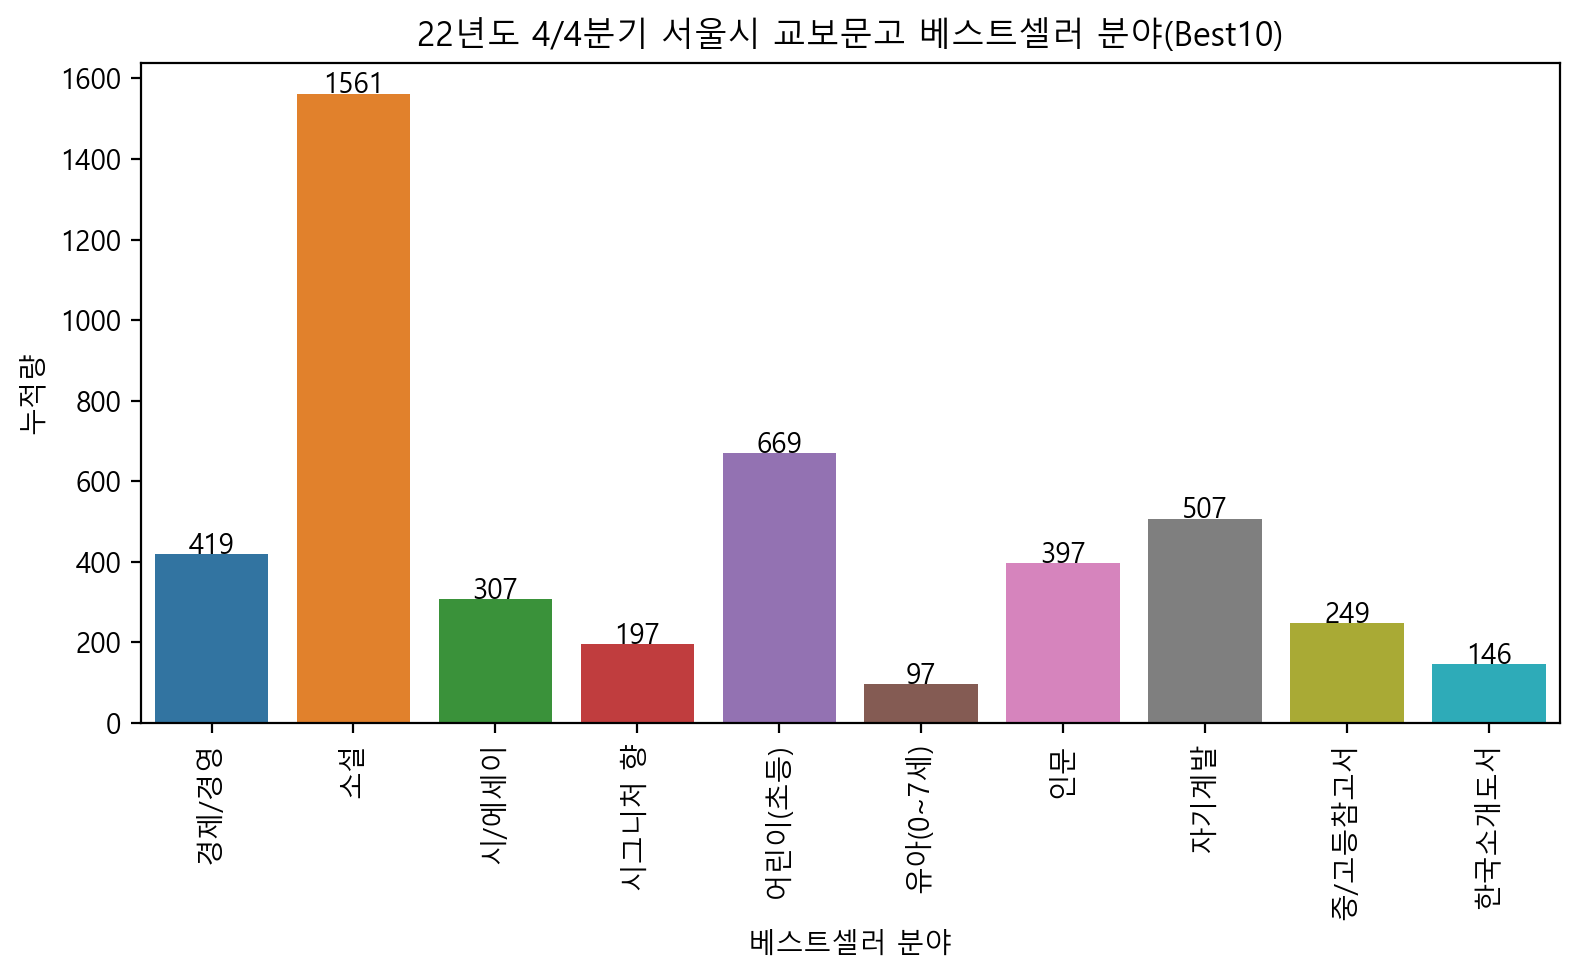

In [7]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data = all_cat_df.head(10).sort_values(by='분야'), 
                 x= '분야', y = '누적 수', width=0.8)
plt.xticks(rotation=90)
plt.xlabel('베스트셀러 분야')
plt.ylabel('누적량');
plt.title('22년도 4/4분기 서울시 교보문고 베스트셀러 분야(Best10)')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f"%(height), (left+width/2, height*1.001), ha='center')
plt.tight_layout()
plt.show()

In [4]:
cond = (raw['saleCmdtClstName'] == '소설') | (raw['saleCmdtClstName'] == '어린이(초등)') | (raw['saleCmdtClstName'] == '자기계발') | (raw['saleCmdtClstName'] == '경제/경영') | (raw['saleCmdtClstName'] == '인문') | (raw['saleCmdtClstName'] == '시/에세이') | (raw['saleCmdtClstName'] == '중/고등참고서') | (raw['saleCmdtClstName'] == '시그니처 향') | (raw['saleCmdtClstName'] == '한국소개도서') | (raw['saleCmdtClstName'] == '유아(0~7세)') 
top10_raw = raw[cond]

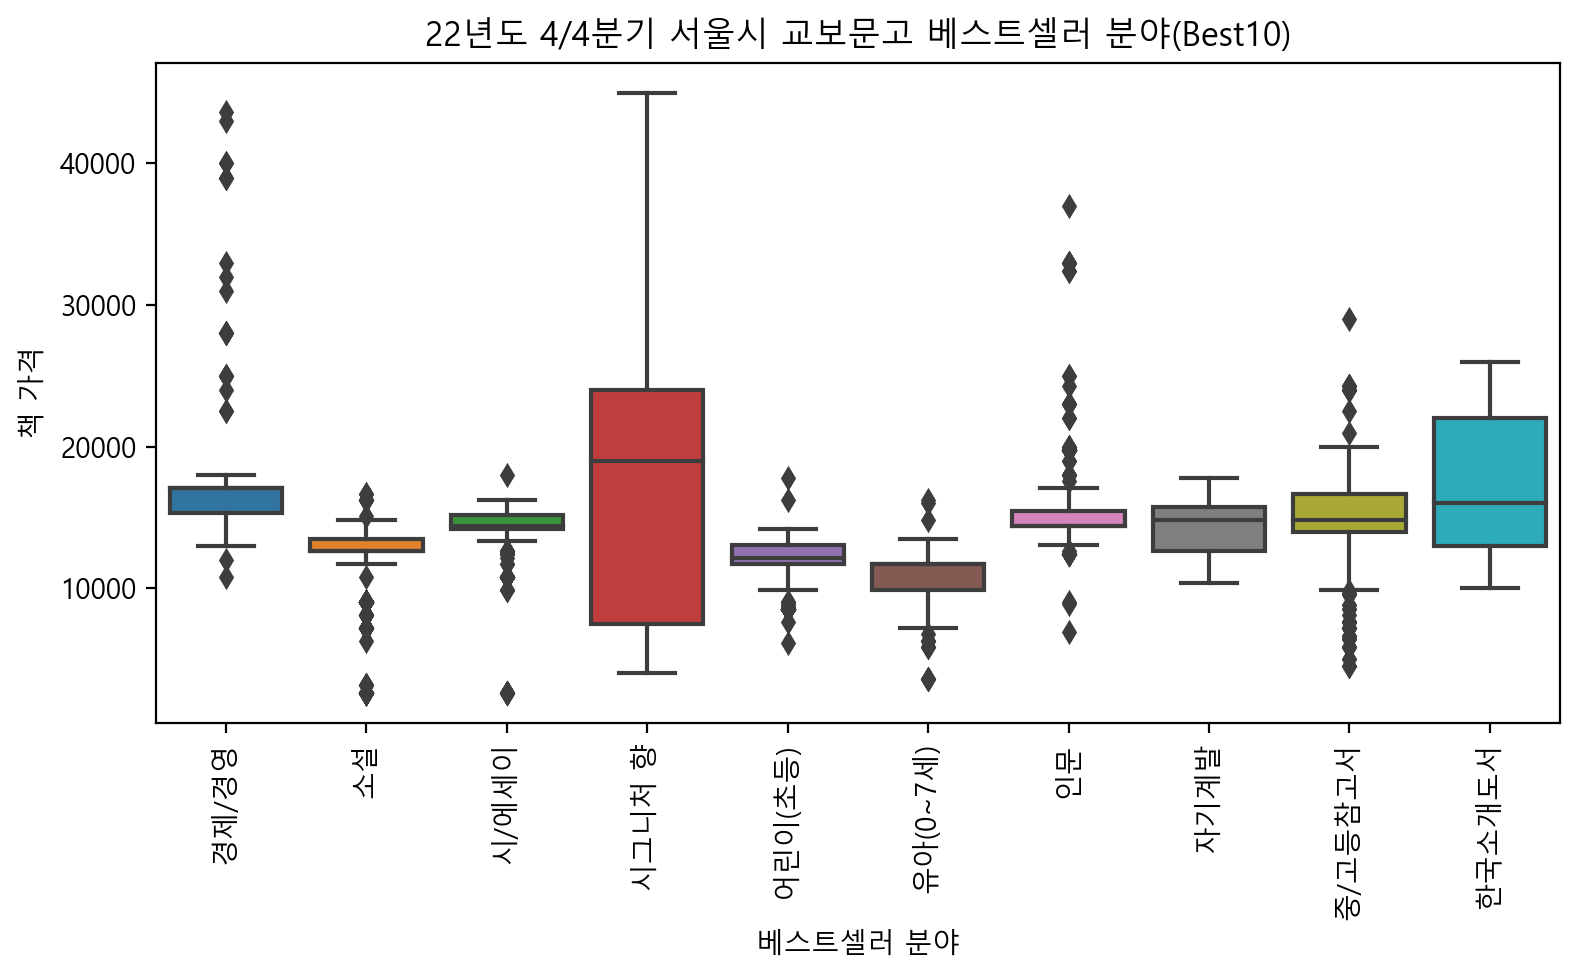

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(data=raw[cond].sort_values(by='saleCmdtClstName'), x='saleCmdtClstName', y='sapr')
plt.xticks(rotation=90)
plt.title('22년도 4/4분기 서울시 교보문고 베스트셀러 분야(Best10)')
plt.xlabel('베스트셀러 분야')
plt.ylabel('책 가격')
plt.tight_layout()
plt.show()

In [8]:
price_10 = top10_raw.groupby('saleCmdtClstName')['sapr'].mean()
price_10 = pd.DataFrame(price_10).reset_index()
price_10 = price_10.rename(columns={'saleCmdtClstName':'분야',
                        'sapr':'평균가격'})
price_10.sort_values(by='평균가격', ascending=False)

,분야,평균가격
3,시그니처 향,19230.964467
0,경제/경영,17192.434368
9,한국소개도서,16657.534247
6,인문,15669.722922
8,중/고등참고서,14696.265060
2,시/에세이,13907.491857
7,자기계발,13901.005917
1,소설,12611.242793
4,어린이(초등),11825.112108
5,유아(0~7세),10492.164948


In [9]:
val = all_cat_df.iloc[:10,0].to_list()
val

['소설',
 '어린이(초등)',
 '자기계발',
 '경제/경영',
 '인문',
 '시/에세이',
 '중/고등참고서',
 '시그니처 향',
 '한국소개도서',
 '유아(0~7세)']

In [10]:
store_cat_df = raw.pivot_table(index='store_name',
               values='cmdtName',
                columns='saleCmdtClstName',
               aggfunc='count')

store_cat_df = store_cat_df.fillna(0)

top10_cat_df = store_cat_df[val]
top10_cat_df = top10_cat_df.reset_index()
top10_cat_df

saleCmdtClstName,store_name,소설,어린이(초등),자기계발,경제/경영,인문,시/에세이,중/고등참고서,시그니처 향,한국소개도서,유아(0~7세)
0,가든파이브 바로드림센터,77.0,110.0,17.0,25.0,19.0,12.0,13.0,0.0,0.0,16.0
1,강남점,97.0,62.0,54.0,44.0,30.0,25.0,1.0,12.0,0.0,8.0
2,건대스타시티 바로드림센터,98.0,31.0,61.0,36.0,32.0,20.0,0.0,28.0,0.0,8.0
3,광화문점,134.0,20.0,33.0,20.0,34.0,34.0,0.0,39.0,0.0,0.0
4,동대문 바로드림센터,93.0,46.0,40.0,23.0,27.0,17.0,2.0,26.0,0.0,8.0
5,디큐브시티 바로드림센터,92.0,43.0,27.0,28.0,28.0,19.0,13.0,3.0,0.0,16.0
6,목동점,95.0,42.0,17.0,15.0,19.0,3.0,115.0,0.0,0.0,2.0
7,서울대점,56.0,1.0,4.0,14.0,13.0,14.0,0.0,2.0,100.0,0.0
8,수유 바로드림센터,114.0,18.0,31.0,24.0,23.0,32.0,20.0,2.0,0.0,1.0
9,영등포점,123.0,42.0,44.0,27.0,25.0,18.0,3.0,13.0,0.0,4.0


In [12]:
new10 = top10_cat_df.sort_values(by=val, ascending=False).rename(columns={'store_name':'지점'}).T
new10

,3,12,9,8,13,14,2,1,6,10,4,15,5,0,7,11
saleCmdtClstName,,,,,,,,,,,,,,,,
지점,광화문점,잠실점,영등포점,수유 바로드림센터,천호점,청량리 바로드림센터,건대스타시티 바로드림센터,강남점,목동점,은평 바로드림센터,동대문 바로드림센터,합정점,디큐브시티 바로드림센터,가든파이브 바로드림센터,서울대점,이화여대점
소설,134.0,126.0,123.0,114.0,113.0,106.0,98.0,97.0,95.0,93.0,93.0,93.0,92.0,77.0,56.0,51.0
어린이(초등),20.0,24.0,42.0,18.0,25.0,91.0,31.0,62.0,42.0,95.0,46.0,11.0,43.0,110.0,1.0,8.0
자기계발,33.0,45.0,44.0,31.0,37.0,29.0,61.0,54.0,17.0,12.0,40.0,54.0,27.0,17.0,4.0,2.0
경제/경영,20.0,35.0,27.0,24.0,31.0,25.0,36.0,44.0,15.0,16.0,23.0,32.0,28.0,25.0,14.0,24.0
인문,34.0,29.0,25.0,23.0,22.0,22.0,32.0,30.0,19.0,22.0,27.0,26.0,28.0,19.0,13.0,26.0
시/에세이,34.0,20.0,18.0,32.0,25.0,16.0,20.0,25.0,3.0,9.0,17.0,31.0,19.0,12.0,14.0,12.0
중/고등참고서,0.0,12.0,3.0,20.0,5.0,7.0,0.0,1.0,115.0,49.0,2.0,8.0,13.0,13.0,0.0,1.0
시그니처 향,39.0,8.0,13.0,2.0,9.0,2.0,28.0,12.0,0.0,1.0,26.0,51.0,3.0,0.0,2.0,1.0


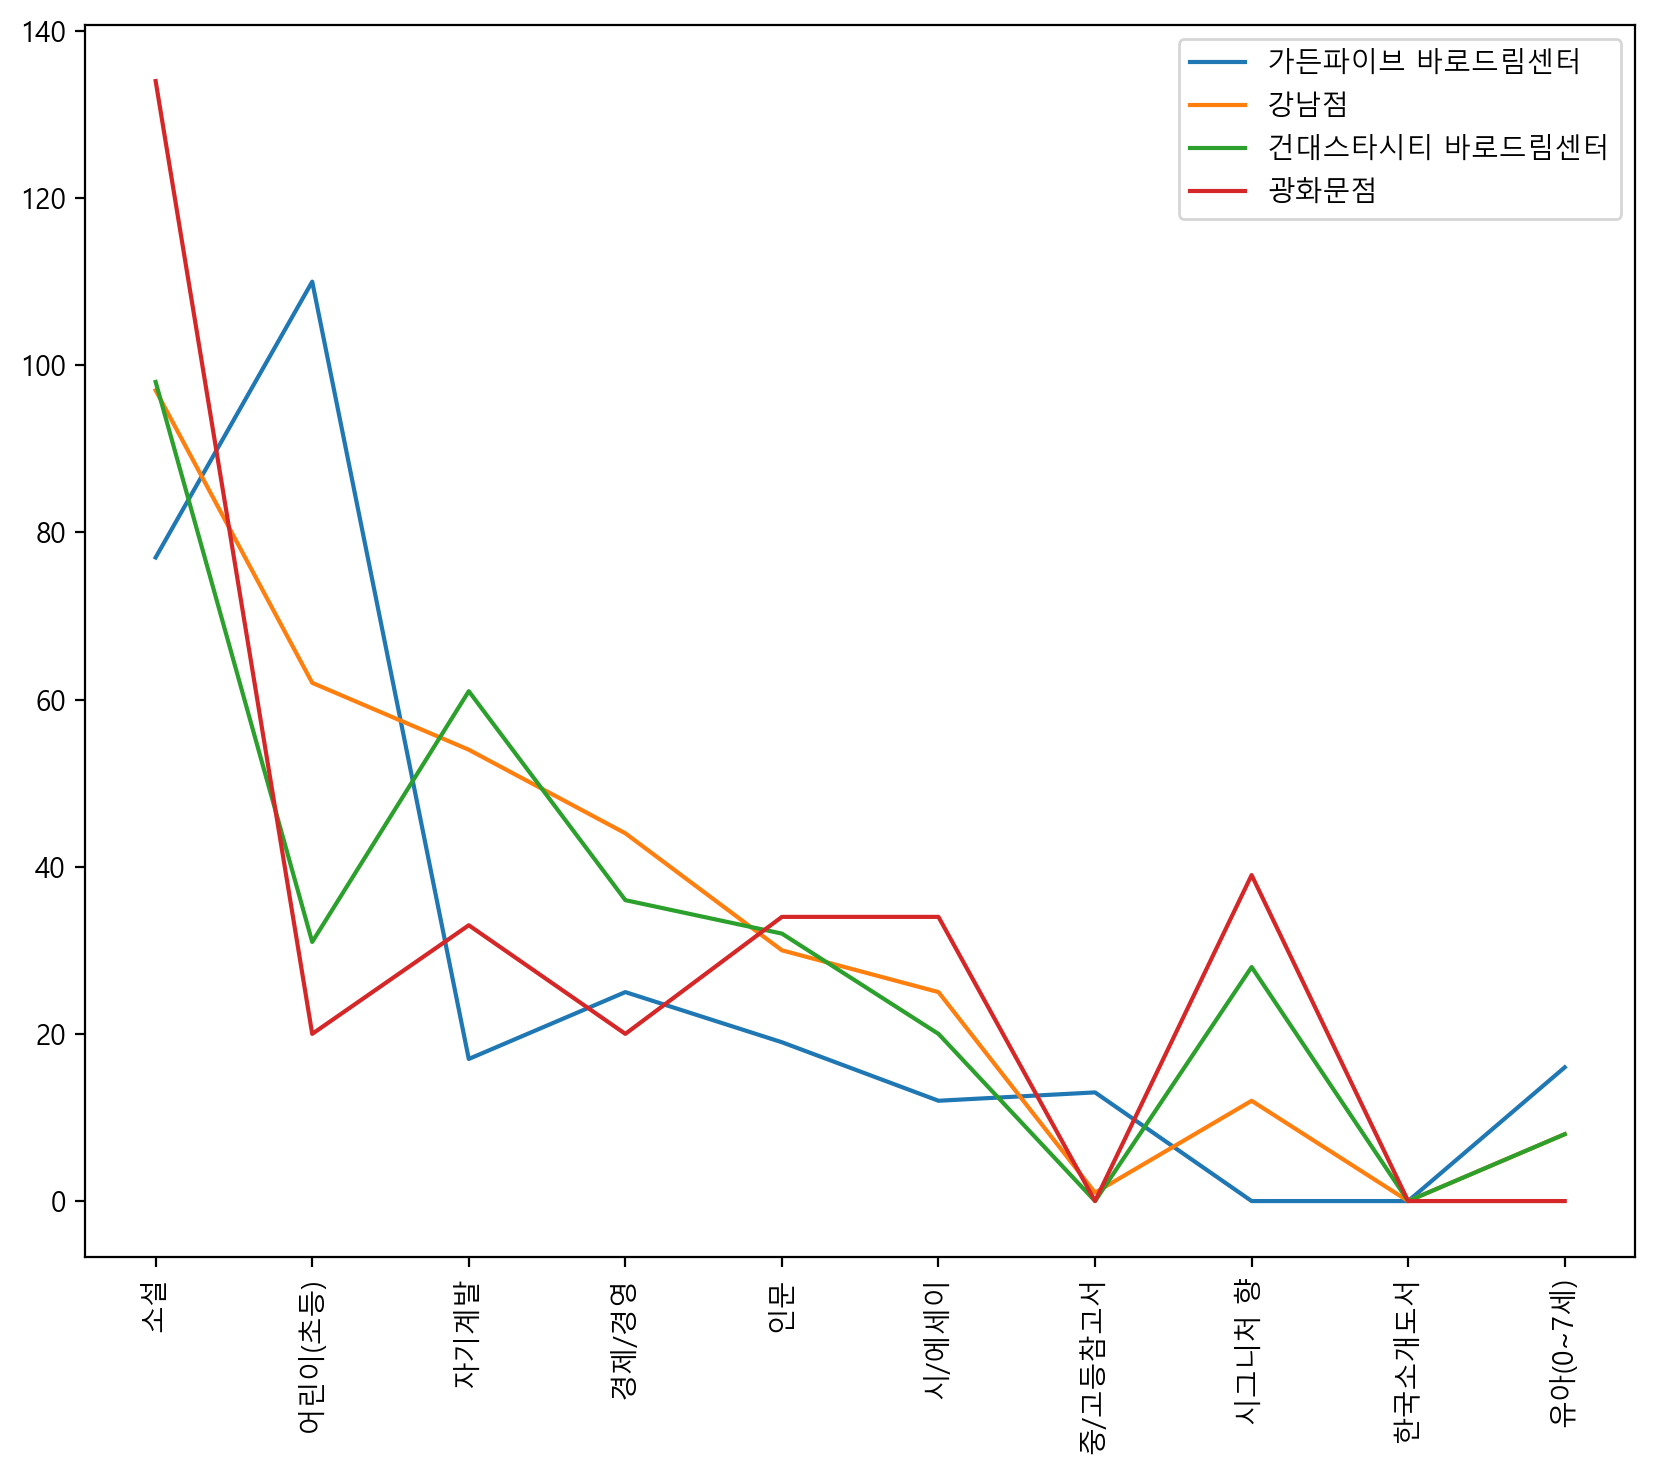

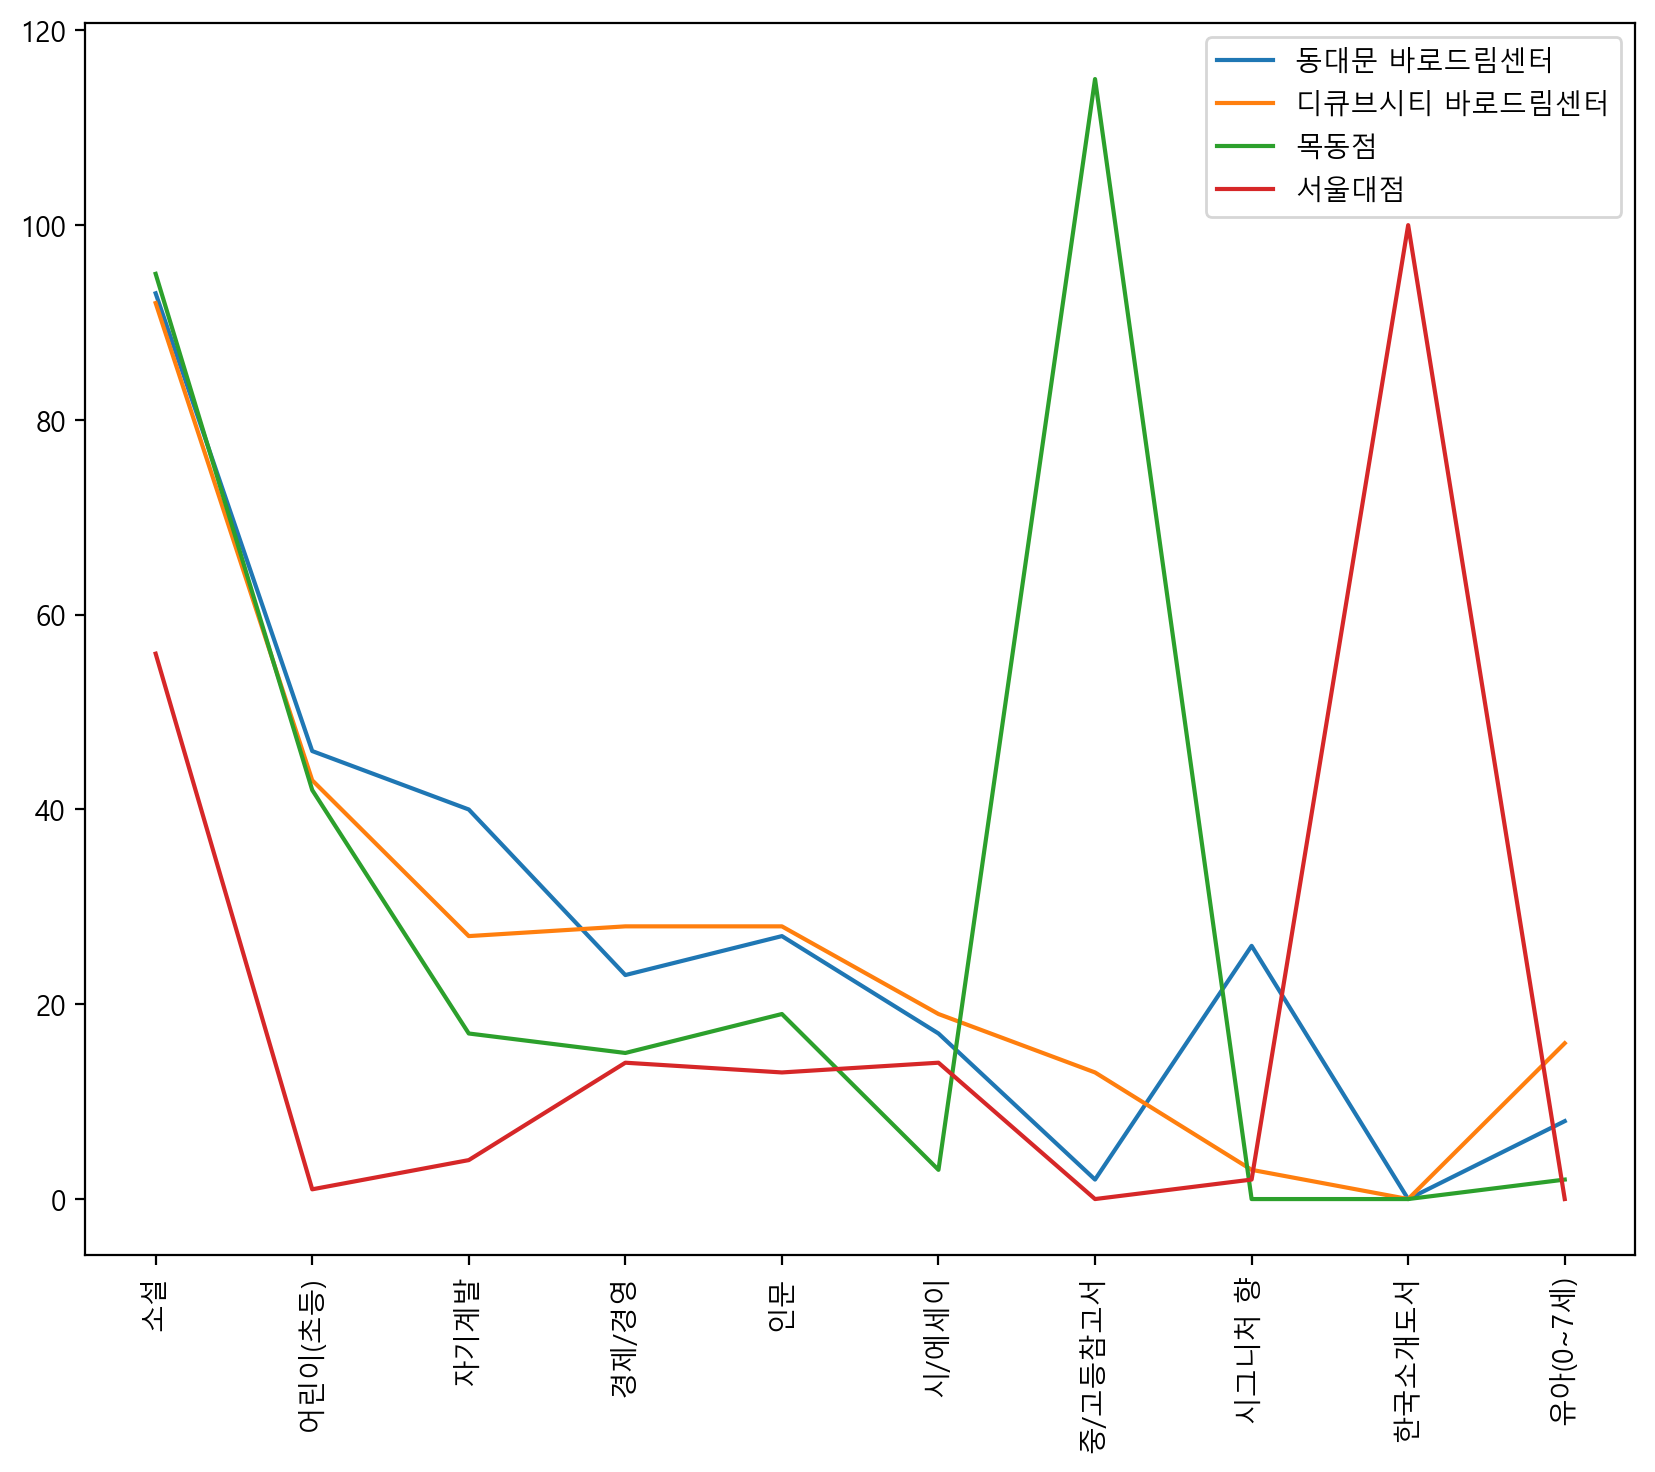

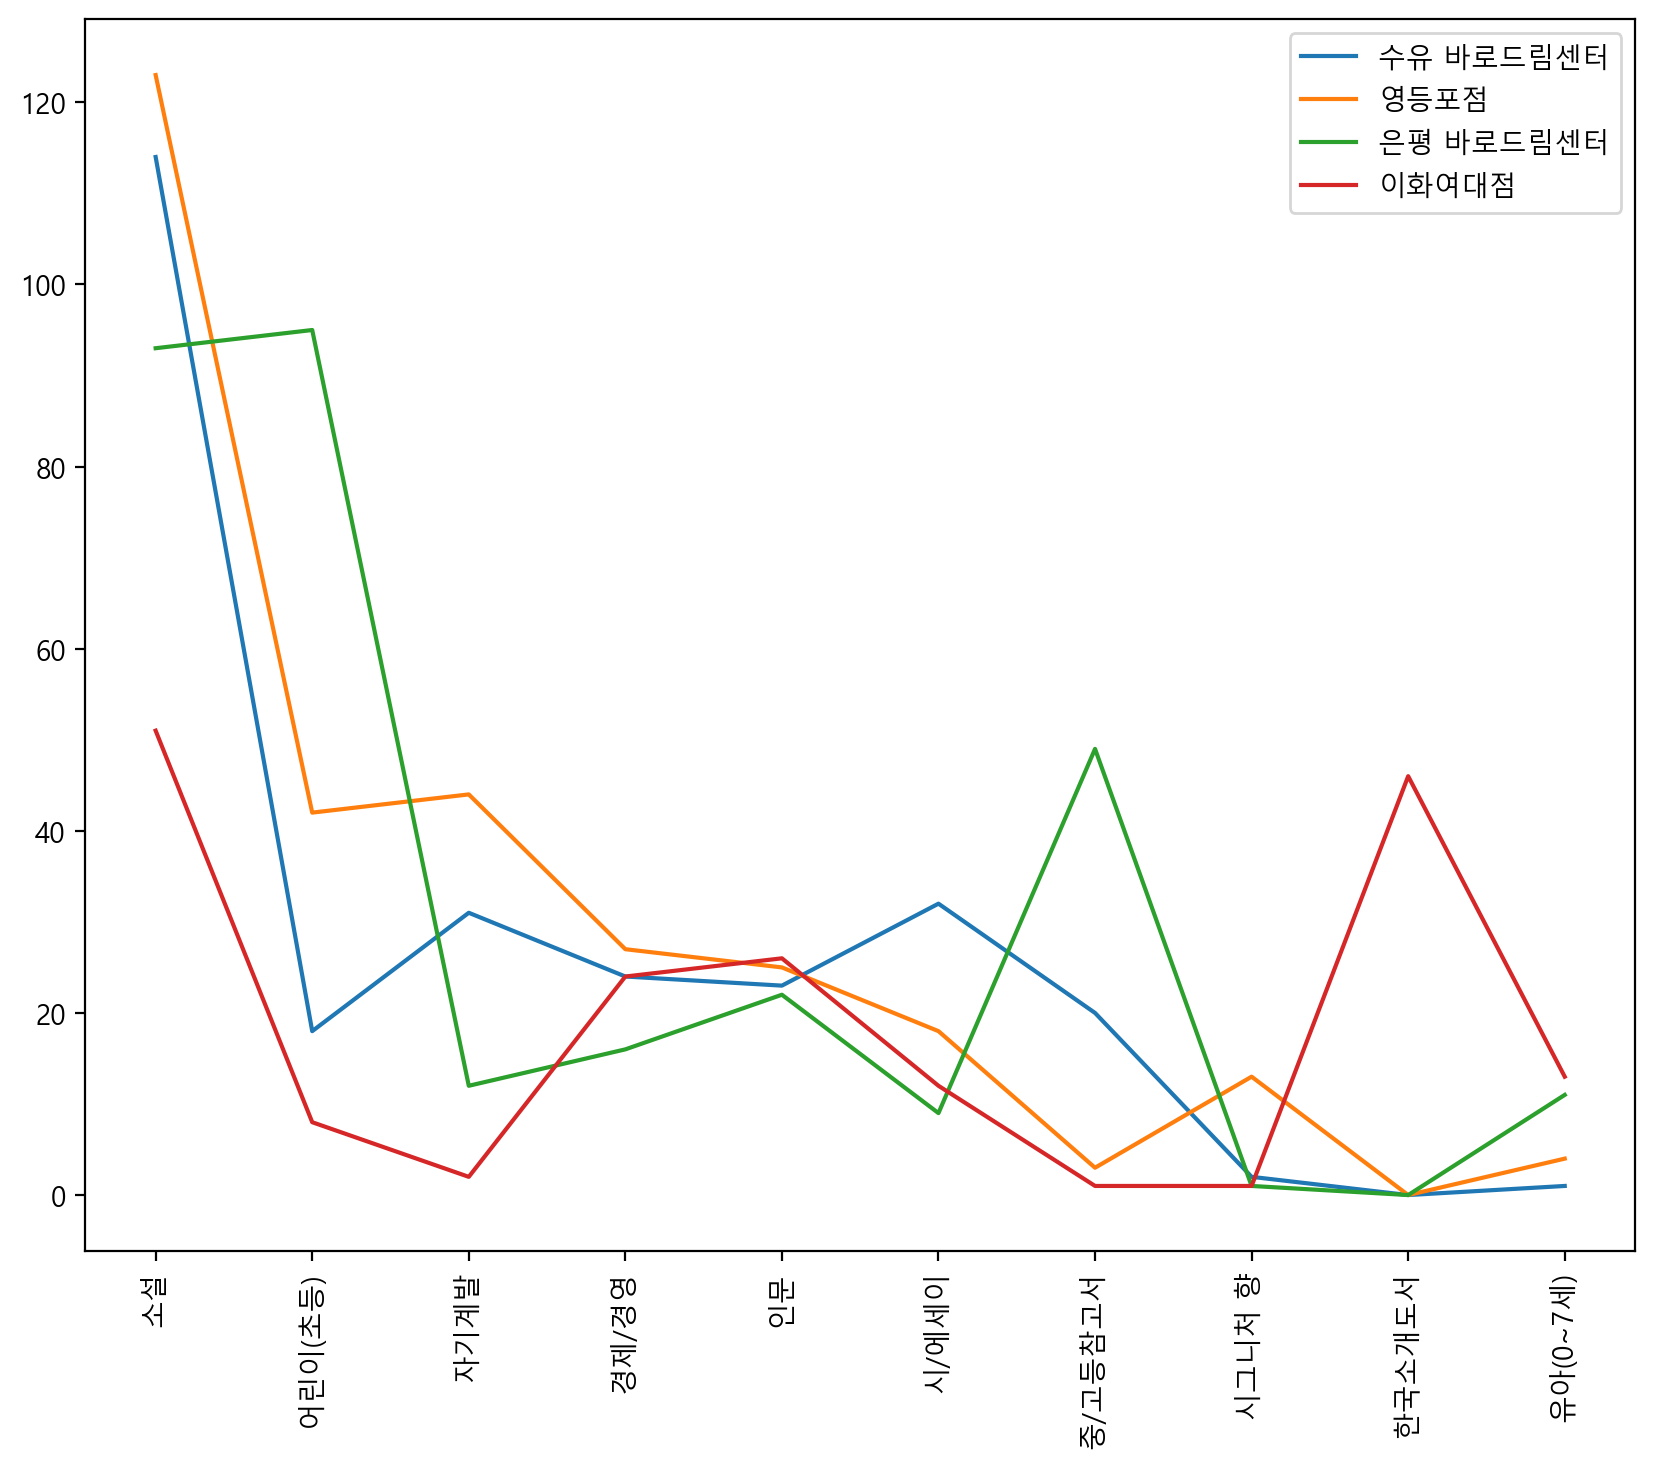

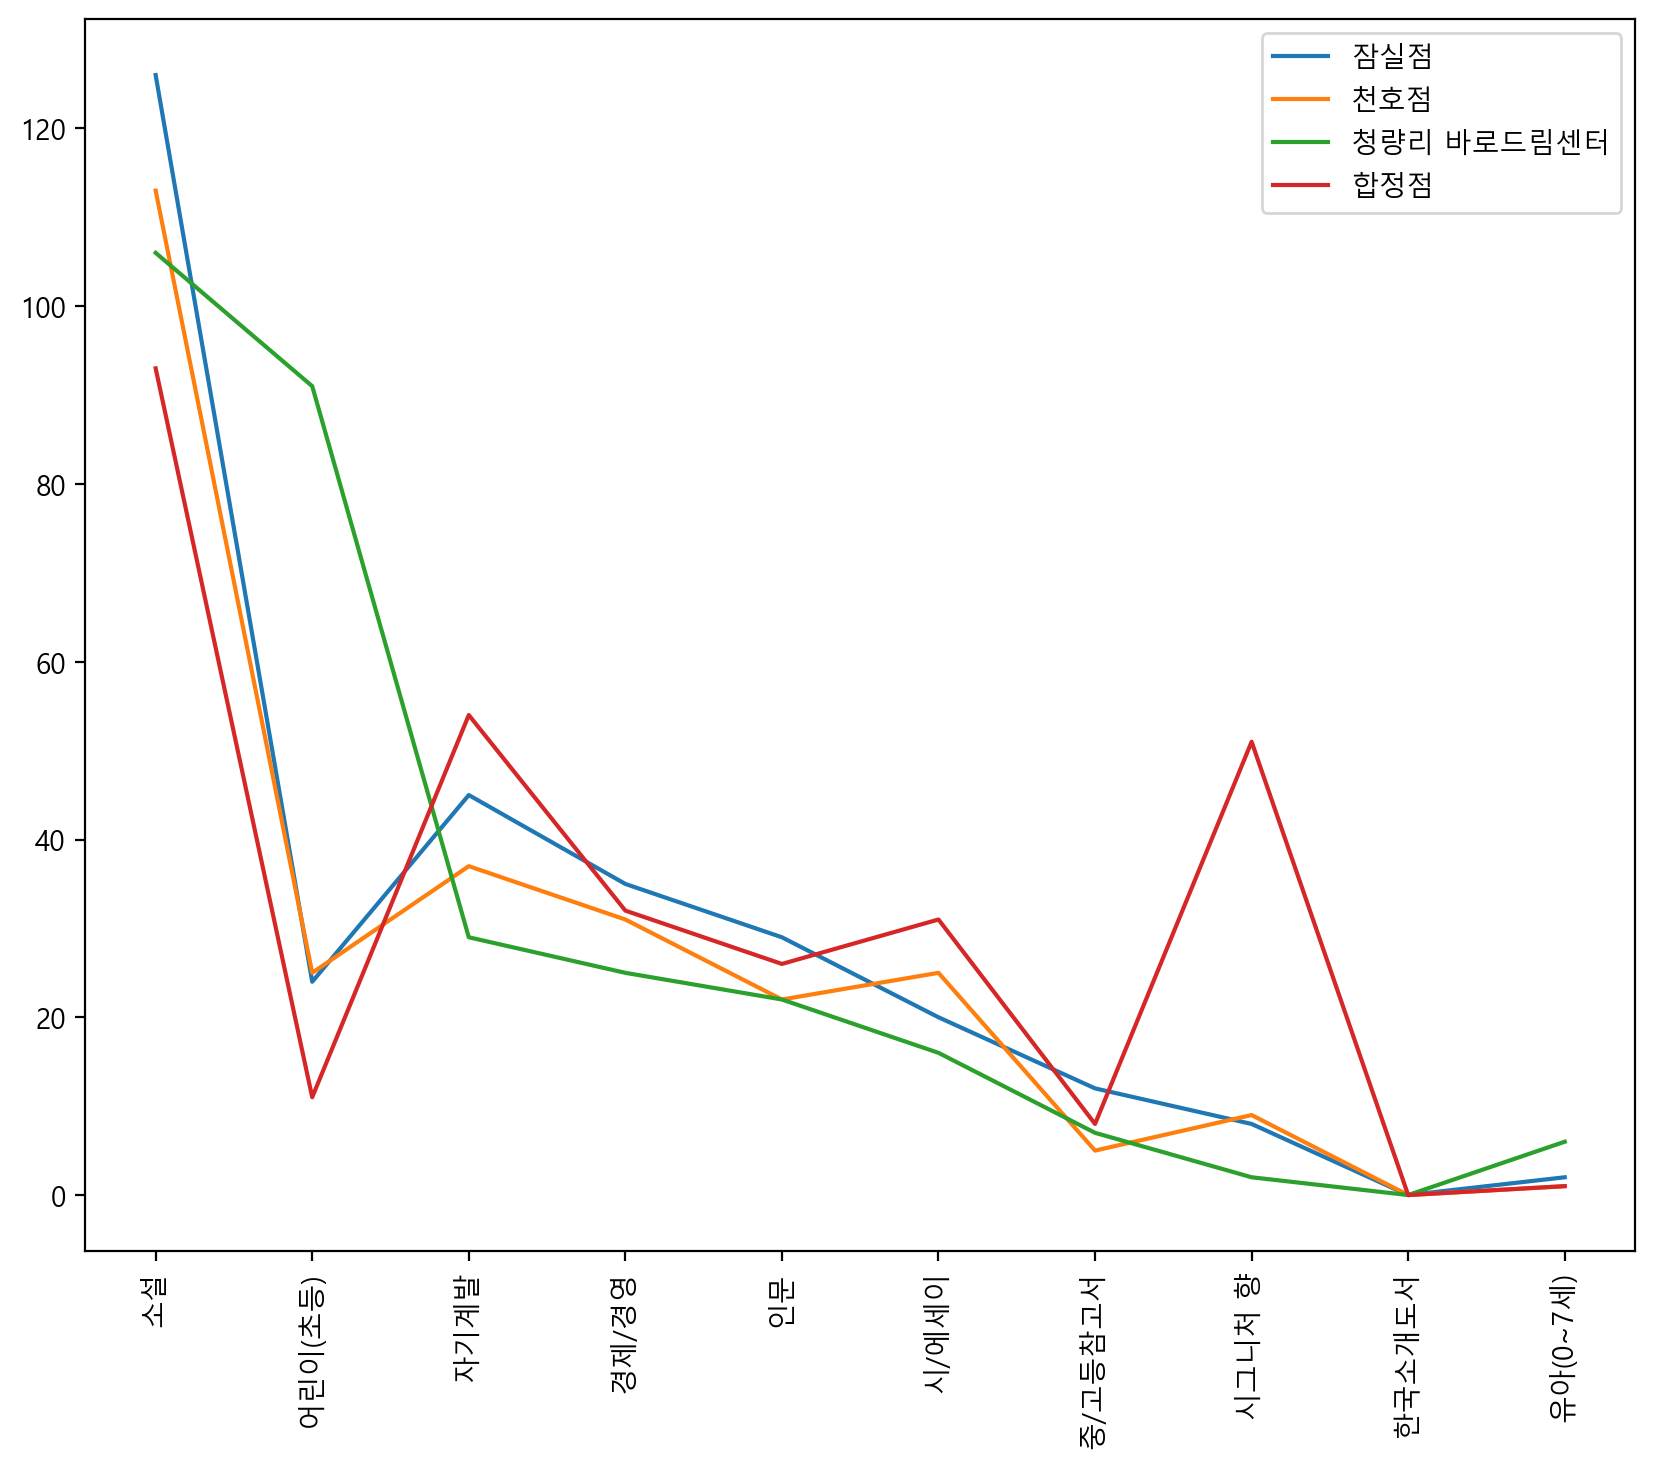

In [13]:
for i in range(len(top10_cat_df)):
    if i % 4 == 0:
        plt.figure(figsize=(10,8))
    plt.plot(top10_cat_df.columns[1:], top10_cat_df.iloc[i][1:], label=top10_cat_df['store_name'][i],)
    plt.legend()
    plt.xticks(rotation=90);

In [14]:
x = np.arange(len(top10_cat_df))
w = 0.1

plt.figure(figsize=(30,50))

for i in top10_cat_df.columns[1:]:
    plt.bar(x, top10_cat_df[i], width=0.05, label=i)
    plt.legend()
    x = x+w
ticklabel = top10_cat_df['store_name']
plt.xticks(x-0.6,ticklabel,fontsize=15,rotation=90)
plt.tight_layout()
plt.show();

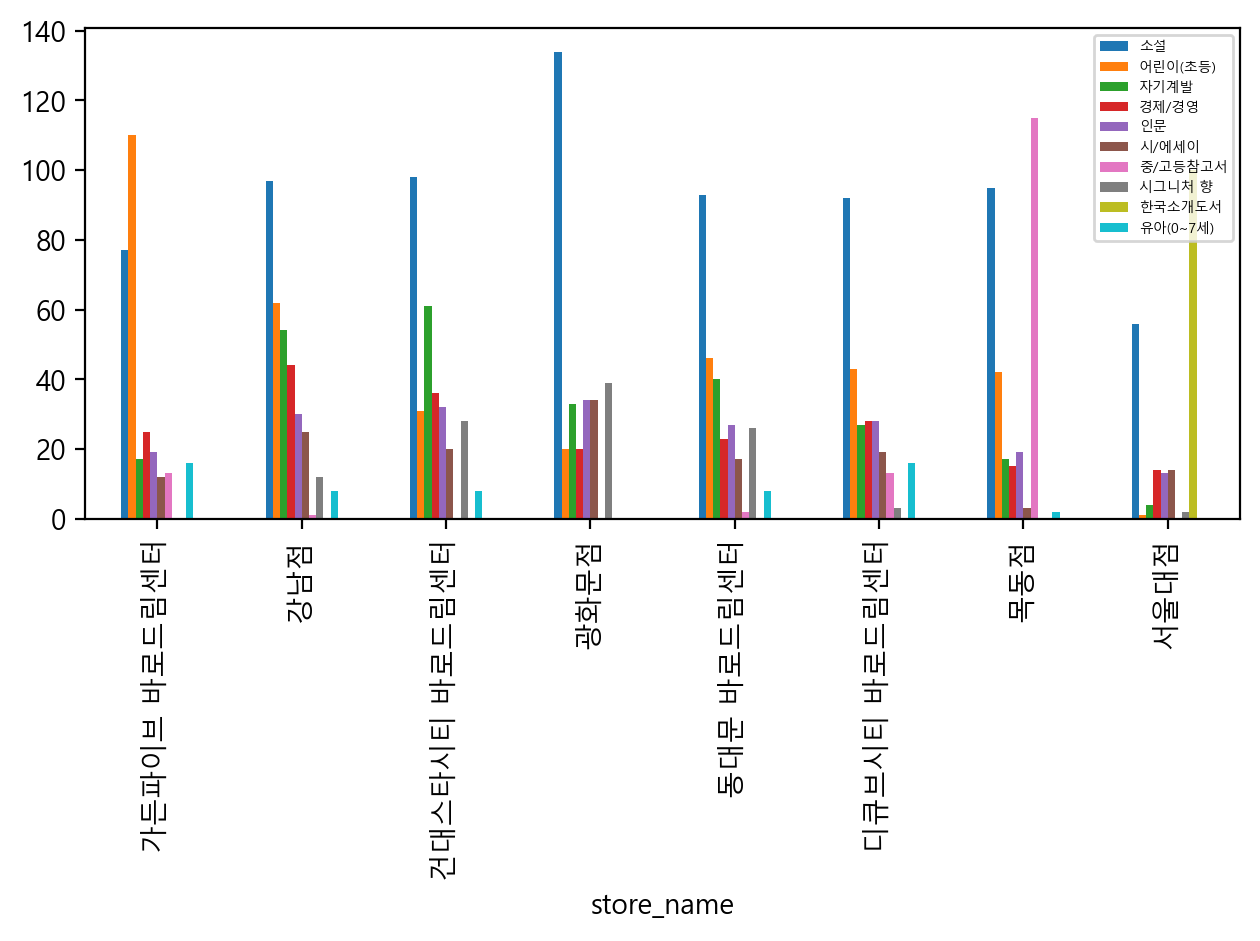

In [15]:
top10_cat_df.iloc[:int(len(top10_cat_df)/2)].set_index('store_name').plot.bar(rot=90)
plt.tight_layout()
plt.legend(fontsize=5)
plt.show()

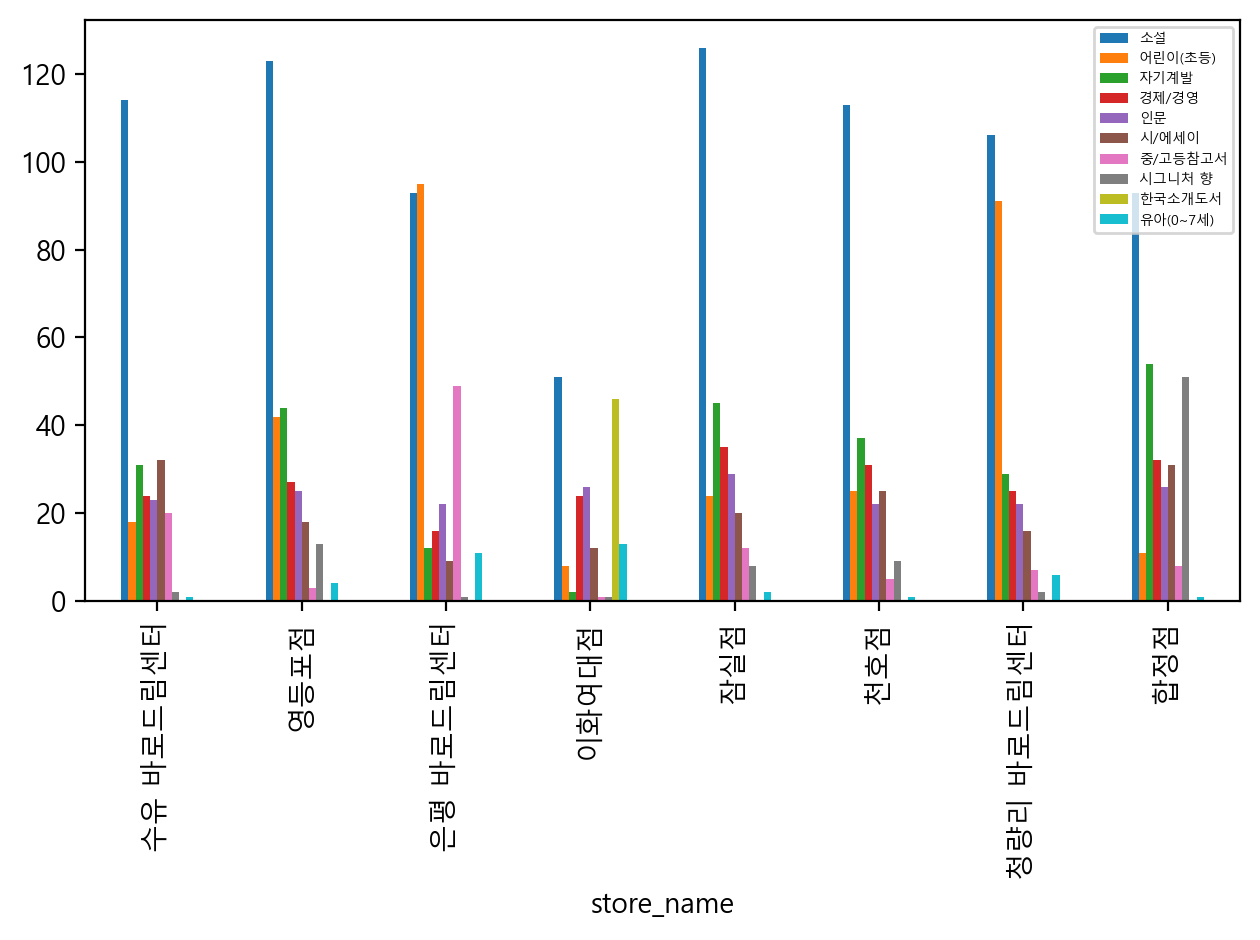

In [16]:
top10_cat_df.iloc[int(len(top10_cat_df)/2):].set_index('store_name').plot.bar(rot=90)
plt.tight_layout()
plt.legend(fontsize=5)
plt.show()

In [17]:
new_p10 = price_10.sort_values(by='평균가격', ascending=False).reset_index(drop=True)
new_p10

,분야,평균가격
0,시그니처 향,19230.964467
1,경제/경영,17192.434368
2,한국소개도서,16657.534247
3,인문,15669.722922
4,중/고등참고서,14696.265060
5,시/에세이,13907.491857
6,자기계발,13901.005917
7,소설,12611.242793
8,어린이(초등),11825.112108
9,유아(0~7세),10492.164948


In [18]:
new_p10['가격 점수'] = np.arange(1, 0.5, -0.05)
new_p10

,분야,평균가격,가격 점수
0,시그니처 향,19230.964467,1.00
1,경제/경영,17192.434368,0.95
2,한국소개도서,16657.534247,0.90
3,인문,15669.722922,0.85
4,중/고등참고서,14696.265060,0.80
5,시/에세이,13907.491857,0.75
6,자기계발,13901.005917,0.70
7,소설,12611.242793,0.65
8,어린이(초등),11825.112108,0.60
9,유아(0~7세),10492.164948,0.55


In [19]:
new_c10 = all_cat_df.head(10).copy()
new_c10

,분야,누적 수
0,소설,1561
1,어린이(초등),669
2,자기계발,507
3,경제/경영,419
4,인문,397
5,시/에세이,307
6,중/고등참고서,249
7,시그니처 향,197
8,한국소개도서,146
9,유아(0~7세),97


In [20]:
from sklearn.preprocessing import MinMaxScaler
mMscaler = MinMaxScaler()
mMscaler.fit(np.sqrt(new_c10['누적 수']).values.reshape(-1,1))
mMscaled_data = mMscaler.transform(np.sqrt(new_c10['누적 수']).values.reshape(-1,1))
mMscaled_data
# mMscaled_data = pd.DataFrame(mMscaled_data)

array([[1.        ],
       [0.53998091],
       [0.42709142],
       [0.35807163],
       [0.33970956],
       [0.25867813],
       [0.19995783],
       [0.14115716],
       [0.07532503],
       [0.        ]])

In [21]:
new_c10['분야 점수'] = mMscaled_data + 0.5
new_c10

,분야,누적 수,분야 점수
0,소설,1561,1.500000
1,어린이(초등),669,1.039981
2,자기계발,507,0.927091
3,경제/경영,419,0.858072
4,인문,397,0.839710
5,시/에세이,307,0.758678
6,중/고등참고서,249,0.699958
7,시그니처 향,197,0.641157
8,한국소개도서,146,0.575325
9,유아(0~7세),97,0.500000


In [23]:
header= new10.iloc[0]
new = new10[1:]
new.rename(columns=header, inplace=True)
new

,광화문점,잠실점,영등포점,수유 바로드림센터,천호점,청량리 바로드림센터,건대스타시티 바로드림센터,강남점,목동점,은평 바로드림센터,동대문 바로드림센터,합정점,디큐브시티 바로드림센터,가든파이브 바로드림센터,서울대점,이화여대점
saleCmdtClstName,,,,,,,,,,,,,,,,
소설,134.0,126.0,123.0,114.0,113.0,106.0,98.0,97.0,95.0,93.0,93.0,93.0,92.0,77.0,56.0,51.0
어린이(초등),20.0,24.0,42.0,18.0,25.0,91.0,31.0,62.0,42.0,95.0,46.0,11.0,43.0,110.0,1.0,8.0
자기계발,33.0,45.0,44.0,31.0,37.0,29.0,61.0,54.0,17.0,12.0,40.0,54.0,27.0,17.0,4.0,2.0
경제/경영,20.0,35.0,27.0,24.0,31.0,25.0,36.0,44.0,15.0,16.0,23.0,32.0,28.0,25.0,14.0,24.0
인문,34.0,29.0,25.0,23.0,22.0,22.0,32.0,30.0,19.0,22.0,27.0,26.0,28.0,19.0,13.0,26.0
시/에세이,34.0,20.0,18.0,32.0,25.0,16.0,20.0,25.0,3.0,9.0,17.0,31.0,19.0,12.0,14.0,12.0
중/고등참고서,0.0,12.0,3.0,20.0,5.0,7.0,0.0,1.0,115.0,49.0,2.0,8.0,13.0,13.0,0.0,1.0
시그니처 향,39.0,8.0,13.0,2.0,9.0,2.0,28.0,12.0,0.0,1.0,26.0,51.0,3.0,0.0,2.0,1.0
한국소개도서,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,46.0


In [25]:
col = new.columns
score_df = pd.DataFrame()
for c in col:
    abc = pd.DataFrame(new[c].sort_values(ascending=False))
    abc = abc.reset_index().rename(columns={'saleCmdtClstName':'분야'})
    abc['분야별 점수'] = abc[c].rank(method = 'max')
    efg = pd.merge(abc, new_c10[['분야','분야 점수']])
    hij = pd.merge(efg, new_p10[['분야','가격 점수']])
    hij['score'] = hij['분야별 점수'] + hij['분야별 점수']*(hij['분야 점수'] * hij['가격 점수'])
    hij['지점'] = c
    hij['목표'] = [f'{i+1}순위' for i in range(10)]
    

#     print(c)
#     print(hij[['지점 목표','분야', 'score']])
    cond_df = hij[['지점','목표','분야', 'score']].sort_values(by='score',ascending=False).head(3)
    score_df = pd.concat([score_df, cond_df], axis=0)
#     print(type(cond_df))
#     print(hij[['지점 목표','분야', 'score']].sort_values(by='score',ascending=False).head(3))
#     print('='*15)

In [26]:
score_df

,지점,목표,분야,score
0,광화문점,1순위,소설,19.750000
1,광화문점,2순위,시그니처 향,14.770414
2,광화문점,3순위,인문,13.710025
0,잠실점,1순위,소설,19.750000
1,잠실점,2순위,자기계발,14.840676
2,잠실점,3순위,경제/경영,14.521344
0,영등포점,1순위,소설,19.750000
1,영등포점,2순위,자기계발,14.840676
2,영등포점,3순위,어린이(초등),12.991908
0,수유 바로드림센터,1순위,소설,19.750000


In [29]:
score_df[score_df['목표']=='1순위']

,지점,목표,분야,score
0,광화문점,1순위,소설,19.750000
0,잠실점,1순위,소설,19.750000
0,영등포점,1순위,소설,19.750000
0,수유 바로드림센터,1순위,소설,19.750000
0,천호점,1순위,소설,19.750000
0,청량리 바로드림센터,1순위,소설,19.750000
0,건대스타시티 바로드림센터,1순위,소설,19.750000
0,강남점,1순위,소설,19.750000
0,목동점,1순위,중/고등참고서,15.599663
0,은평 바로드림센터,1순위,어린이(초등),16.239885


In [30]:
score_df[(score_df['목표']=='1순위') & (score_df['분야']!='소설')]

,지점,목표,분야,score
0,목동점,1순위,중/고등참고서,15.599663
0,은평 바로드림센터,1순위,어린이(초등),16.239885
0,가든파이브 바로드림센터,1순위,어린이(초등),16.239885
0,서울대점,1순위,한국소개도서,15.177925


In [27]:
score_df[score_df['목표']=='2순위']

,지점,목표,분야,score
1,광화문점,2순위,시그니처 향,14.770414
1,잠실점,2순위,자기계발,14.840676
1,영등포점,2순위,자기계발,14.840676
1,수유 바로드림센터,2순위,시/에세이,14.121077
1,천호점,2순위,자기계발,14.840676
1,청량리 바로드림센터,2순위,어린이(초등),14.615897
1,건대스타시티 바로드림센터,2순위,자기계발,14.840676
1,강남점,2순위,어린이(초등),14.615897
1,목동점,2순위,소설,17.775000
1,은평 바로드림센터,2순위,소설,17.775000


In [28]:
score_df[score_df['목표']=='3순위']

,지점,목표,분야,score
2,광화문점,3순위,인문,13.710025
2,잠실점,3순위,경제/경영,14.521344
2,영등포점,3순위,어린이(초등),12.991908
2,수유 바로드림센터,3순위,자기계발,13.191712
2,천호점,3순위,경제/경영,14.521344
2,청량리 바로드림센터,3순위,자기계발,13.191712
2,건대스타시티 바로드림센터,3순위,경제/경영,14.521344
2,강남점,3순위,자기계발,13.191712
2,목동점,3순위,어린이(초등),12.991908
2,은평 바로드림센터,3순위,중/고등참고서,12.479730
